# Data Mining Project - Dry Beans

## Importing Packages

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

from dmba import plotDecisionTree, classificationSummary, regressionSummary
import statsmodels.formula.api as sm
import statsmodels.api as sm


from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline
import matplotlib.pylab as plt


from sklearn.metrics import mean_squared_error as mse
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from dmba import classificationSummary, regressionSummary

import sys
import os

## Data Preprocessing 

In [2]:
# Creating data frame for Dry Beans data set.
drybean_df=pd.read_csv('Dry_Bean_Dataset.csv')
# Display the first 10 records of drybean_df data frame.
print()
print("Dry Beans Dataset dimensions")
print(f"Number of rows: {drybean_df.shape[0]}")
print(f"Number of columns: {drybean_df.shape[1]}")
print()
drybean_df.head(10)


Dry Beans Dataset dimensions
Number of rows: 13611
Number of columns: 17



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


## Columns/Variables used in dry bean data set

In [3]:
#Columns/Variables used in dry bean data set
print("Columns in the Dry Bean Data set")
print(drybean_df.columns)

Columns in the Dry Bean Data set
Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


## Columns/Variables data types

In [4]:
print("Original Column data types of Dry Bean Dataset")
print()
print(drybean_df.dtypes)

print()

print("Preprocessed Column data types of Dry Bean Dataset")
print()
# Treating 'Class' as categorical variable
drybean_df.Class = drybean_df.Class.astype('category')
print(drybean_df.dtypes)

Original Column data types of Dry Bean Dataset

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

Preprocessed Column data types of Dry Bean Dataset

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
EquivDiameter       float64
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeF

## Replacing each class into number for classification (Nominal Logistic Regression)

In [5]:
drybean_df["Class"].replace({"BARBUNYA": 0, "BOMBAY": 1, "CALI": 2, "DERMASON": 3, "HOROZ" : 4, "SEKER" : 5, "SIRA" : 6}, inplace=True)

drybean_df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


In [6]:
# Description of Dry Bean Data set
drybean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,3.532657
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,1.828709
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,2.000000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,3.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,5.000000
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,6.000000


## Partitioning of Data : Training set and Validation set

In [7]:
# Identifying outcome for Drybeans. The outcome variable is 'Class'  
# It is a multi-class outcome variable with 7 classes.

outcome = 'Class'

# Identifying predictors for Dry Beans. 
predictors = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

# Create outcome (y) and predictor (X) variables. 
y = drybean_df[outcome]
X = drybean_df[predictors]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the accidents_upd data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Nominal Logistic Regression Model for Dry Beans Dataset.

In [8]:
# Developing and displaying Nominal Logistic Model for dry beans data set.
# Utilizing LogisticRegression() function to develop nominal logistic regression. 

logit_nom = LogisticRegression(penalty="l2", solver='lbfgs', 
               max_iter=10000, C=1e24, multi_class='multinomial')
logit_nom.fit(train_X, train_y)

# Displaying intercept (logit_nom.interpcept_) and coefficients of
# the nominal logistic regression (logit_nom.coef_). 
print()
print('Nominal Logistic Regression for Dry Beans dataset')
print('  Intercepts', logit_nom.intercept_)
print('  Coefficients', logit_nom.coef_)
print()


Nominal Logistic Regression for Dry Beans dataset
  Intercepts [-0.00057134 -0.00053085  0.00012553  0.00075401 -0.000334    0.00044613
  0.00011052]
  Coefficients [[-3.89911211e-04  1.10031754e-01 -1.52431555e-01 -5.80263236e-02
  -1.11701513e-03 -4.82566274e-04  4.51497345e-04 -7.94520937e-02
  -5.61511454e-04 -5.64018258e-04 -1.13350935e-03 -3.70734568e-04
  -5.53052536e-06 -9.89827629e-07 -2.36090513e-04 -4.59549926e-04]
 [ 7.91331392e-04 -2.88955528e-01 -1.09272604e-01 -6.71195271e-02
  -8.51623898e-04 -3.99600810e-04  3.63022975e-03 -8.51145642e-02
  -3.92780553e-04 -5.23723818e-04 -4.62877158e-04 -4.22786417e-04
  -4.17787540e-06 -1.08126387e-06 -3.39180931e-04 -5.28595970e-04]
 [-3.20373958e-03 -4.34361227e-02  1.05434013e-01  1.75148418e-03
   6.53228244e-04  2.67801705e-04  3.36686069e-03  3.46254843e-02
   5.17203382e-04  1.24316126e-04  3.15025475e-04 -4.49027089e-05
   1.13587301e-06 -7.70880187e-07 -1.52576897e-04  6.49822738e-05]
 [ 3.79286117e-03  6.90956150e-02  6.82

In [9]:
# Classifying nominal logistic outcomes results_nom and probabilities prob_nom for validation partition, 
# i.e., p(0), p(1), p(2)...p(6) for dry beans data set.

results_nom = logit_nom.predict(valid_X)
prob_nom = np.round(logit_nom.predict_proba(valid_X), decimals = 4)

# Creating data frame to show nominal logistic model resuts for dry beans data set. 

print()
print('Classification for First 10 Records in Validation Data Set')
results_nom = pd.DataFrame({
    'Actual': valid_y,
    'p(0)': [p[0] for p in prob_nom],
    'p(1)': [p[1] for p in prob_nom],
    'p(2)': [p[2] for p in prob_nom],
    'p(3)': [p[3] for p in prob_nom],
    'p(4)': [p[4] for p in prob_nom],
    'p(5)': [p[5] for p in prob_nom],
    'p(6)': [p[6] for p in prob_nom], 'Classification': results_nom
})

# Displaying top 10 records with actual classes and classification results, and respective probabilities.  
results_nom.head(10)


Classification for First 10 Records in Validation Data Set


,Actual,p(0),p(1),p(2),p(3),p(4),p(5),p(6),Classification
10057,6,0.0159,0.0,0.6125,0.0000,0.1549,0.0000,0.2167,2
13354,3,0.0001,0.0,0.0001,0.4724,0.0006,0.0010,0.5257,6
13141,3,0.0001,0.0,0.0000,0.6952,0.0000,0.0068,0.2979,3
8634,6,0.0004,0.0,0.0011,0.0070,0.2430,0.0000,0.7485,6
12579,3,0.0000,0.0,0.0000,0.7854,0.0000,0.1692,0.0453,3
11088,3,0.0000,0.0,0.0000,0.9968,0.0001,0.0000,0.0030,3
13111,3,0.0000,0.0,0.0000,0.6947,0.0007,0.0003,0.3042,3
9369,6,0.0006,0.0,0.0015,0.0004,0.6108,0.0000,0.3867,4
9826,6,0.0198,0.0,0.0567,0.0002,0.0055,0.0001,0.9178,6
13193,3,0.0000,0.0,0.0001,0.4825,0.0058,0.0001,0.5115,6


## Accuracy measures for Training and Validation partition (Nominal Logistic Regression). 

In [10]:
# Identify and display confusion matrix for training partition. 
print('Training Partition for Nominal Logistic Model')
classificationSummary(train_y, logit_nom.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Nominal Logistic Model')
classificationSummary(valid_y, logit_nom.predict(valid_X))

Training Partition for Nominal Logistic Model
Confusion Matrix (Accuracy 0.9166)

       Prediction
Actual    0    1    2    3    4    5    6
     0  711    0   63    0    5    8   21
     1    0  307    0    0    0    0    0
     2   32    0  893    0   23    1   13
     3    1    0    0 1965    2   40  140
     4    3    0   19   11 1125    0   22
     5    6    0    2   15    0 1129   39
     6    4    0    5  152   30   24 1355

Validation Partition for Nominal Logistic Model
Confusion Matrix (Accuracy 0.9085)

       Prediction
Actual    0    1    2    3    4    5    6
     0  446    0   36    0    2    5   25
     1    0  215    0    0    0    0    0
     2   27    1  622    0   12    1    5
     3    0    0    0 1277    0   20  101
     4    3    0   10   12  704    0   19
     5    6    0    0   26    0  773   31
     6    0    0    3  111   23   19  910


## Gains and Lift charts for each probability of class.

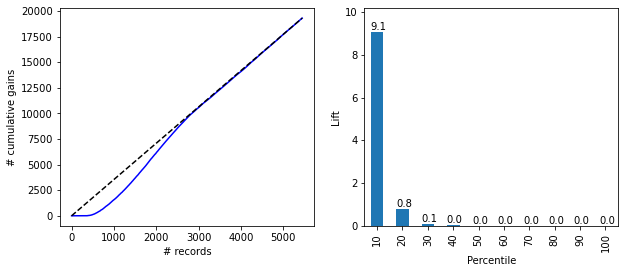

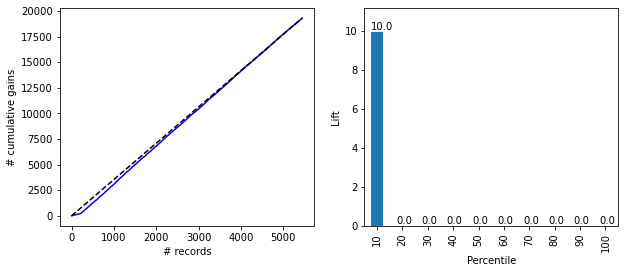

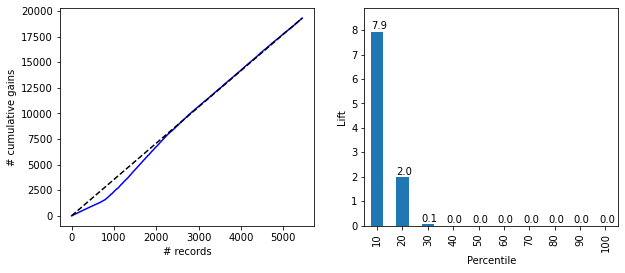

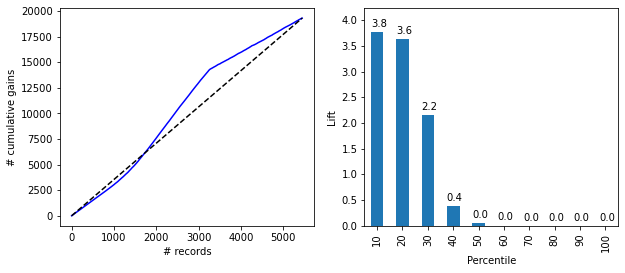

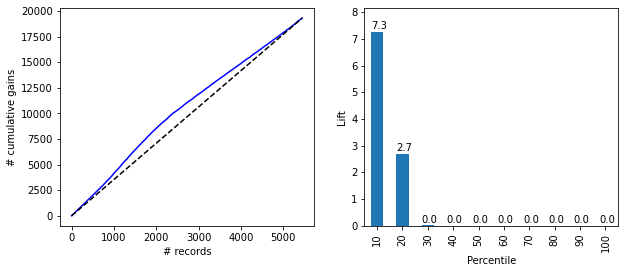

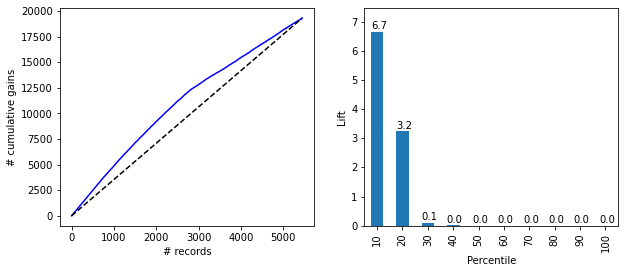

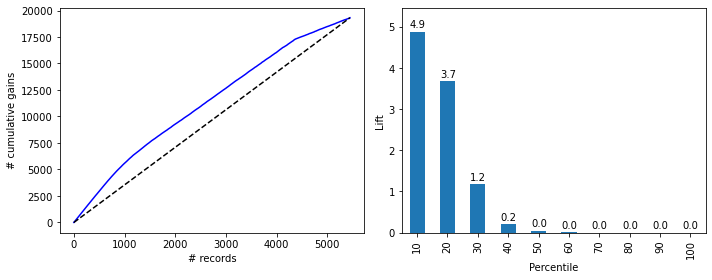

In [11]:
# Developing and displaying Gains chart and Lift chart. 

# Using gainsChart() function, create Gains chart. 
# Using liftChart() function, create decile-wise Lift chart. 

df_0 = results_nom.sort_values(by=['p(0)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_0.Actual, ax=axes[0], color='Blue')
liftChart(df_0['p(0)'], title=False, ax=axes[1])

df_1 = results_nom.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_1.Actual, ax=axes[0], color='Blue')
liftChart(df_1['p(1)'], title=False, ax=axes[1])

df_2 = results_nom.sort_values(by=['p(2)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_2.Actual, ax=axes[0], color='Blue')
liftChart(df_2['p(2)'], title=False, ax=axes[1])

df_3 = results_nom.sort_values(by=['p(3)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_3.Actual, ax=axes[0], color='Blue')
liftChart(df_3['p(3)'], title=False, ax=axes[1])

df_4 = results_nom.sort_values(by=['p(4)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_4.Actual, ax=axes[0], color='Blue')
liftChart(df_4['p(4)'], title=False, ax=axes[1])

df_5 = results_nom.sort_values(by=['p(5)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_5.Actual, ax=axes[0], color='Blue')
liftChart(df_5['p(5)'], title=False, ax=axes[1])

df_6 = results_nom.sort_values(by=['p(6)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df_6.Actual, ax=axes[0], color='Blue')
liftChart(df_6['p(6)'], title=False, ax=axes[1])

 
# Display the charts. 
plt.tight_layout()
plt.show()

In [12]:
# Testing Statistical significance of predictors in dry beans data set

# Same initial preprocessing and creating dummies.

# Create a data frame for statsmodels package. 
drybeans_df_sm = drybean_df

# Add constant column.
drybeans_df_sm = sm.add_constant(drybeans_df_sm, prepend=True)

# Create predictors X and output variable y.   
X = drybeans_df_sm.drop(columns=['Class'])
y = drybeans_df_sm['Class']

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Use GLM (generalized linear model) with the binomial family 
# to fit a logistic regression.
log_reg_sm = sm.GLM(train_y, train_X, family=sm.families.Binomial())
log_result_sm = log_reg_sm.fit()
print(log_result_sm.summary())

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:                 8166
Model:                            GLM   Df Residuals:                     8149
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 May 2021   Deviance:                          nan
Time:                        15:31:36   Pearson chi2:                 3.57e+20
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.294e+20   2.77e+09   4.

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -
C:\Users\admin\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


# Decision Trees Model for Dry Beans Dataset 

## Five-fold cross-validation of the full decision tree classifier

In [13]:
# Create a data frame in Python using Dry_Bean_Dataset.csv file.
drybean_df = pd.read_csv('Dry_Bean_Dataset.csv')
# Develop predictors X and output variable Y for the data set.
X = drybean_df.drop(columns=['Class'])
y = drybean_df['Class']

# Develop training (60%) and validation(40% or 0.4) partitions for
# Dry BEans data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Five-fold cross-validation of the full decision tree classifier.
# Develop full classification tree.  
treeClassifier = DecisionTreeClassifier()

# Use cross_val_score() function to identify performance 
# accuracy for 5 folds (cv=5) of cross-validation partitioning.
scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)

# Display performance accuracy scores for each fold partition.
# Use three decimals (.3f) for each accuracy score using the 
# acc (accumulator) parameter. 
print('Performance Accuracy of 5-Fold Cross-Validation')
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])

# Indetify and display two standard deviation confidence interval for 
# population mean scores.
print()
print('Two Standard Deviation (95%) Confidence Interval for Mean Accuracy')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Performance Accuracy of 5-Fold Cross-Validation
Accuracy scores of each fold:  ['0.892', '0.897', '0.893', '0.889', '0.879']

Two Standard Deviation (95%) Confidence Interval for Mean Accuracy
Accuracy: 0.890 (+/- 0.012)


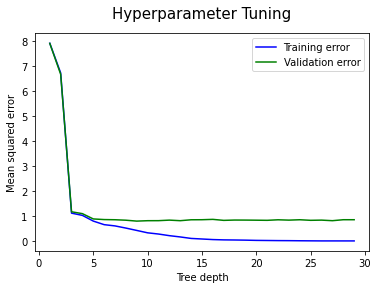

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in drybean_df.columns:
    if drybean_df[column_name].dtype == object:
        drybean_df[column_name] = le.fit_transform(drybean_df[column_name])
    else:
        pass

# Develop predictors X and output variable Y for the data set.
X = drybean_df.drop(columns=['Class'])
y = drybean_df['Class']

# Develop training (60%) and validation(40% or 0.4) partitions for
# Dry Beans data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
    
max_depths = range(1, 30)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mse(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(train_X, train_y)
    testing_error.append(mse(valid_y, model_2.predict(valid_X)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Validation error')
plt.xlabel('Tree depth')
#plt.axvline(x=7, color='orange', linestyle='--')
#plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.savefig('error.png')

## Smaller Classification Tree using DecisionTreeClassifier() control parameters.

Classes: BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, SIRA
Small Classification Tree with Control Parameters


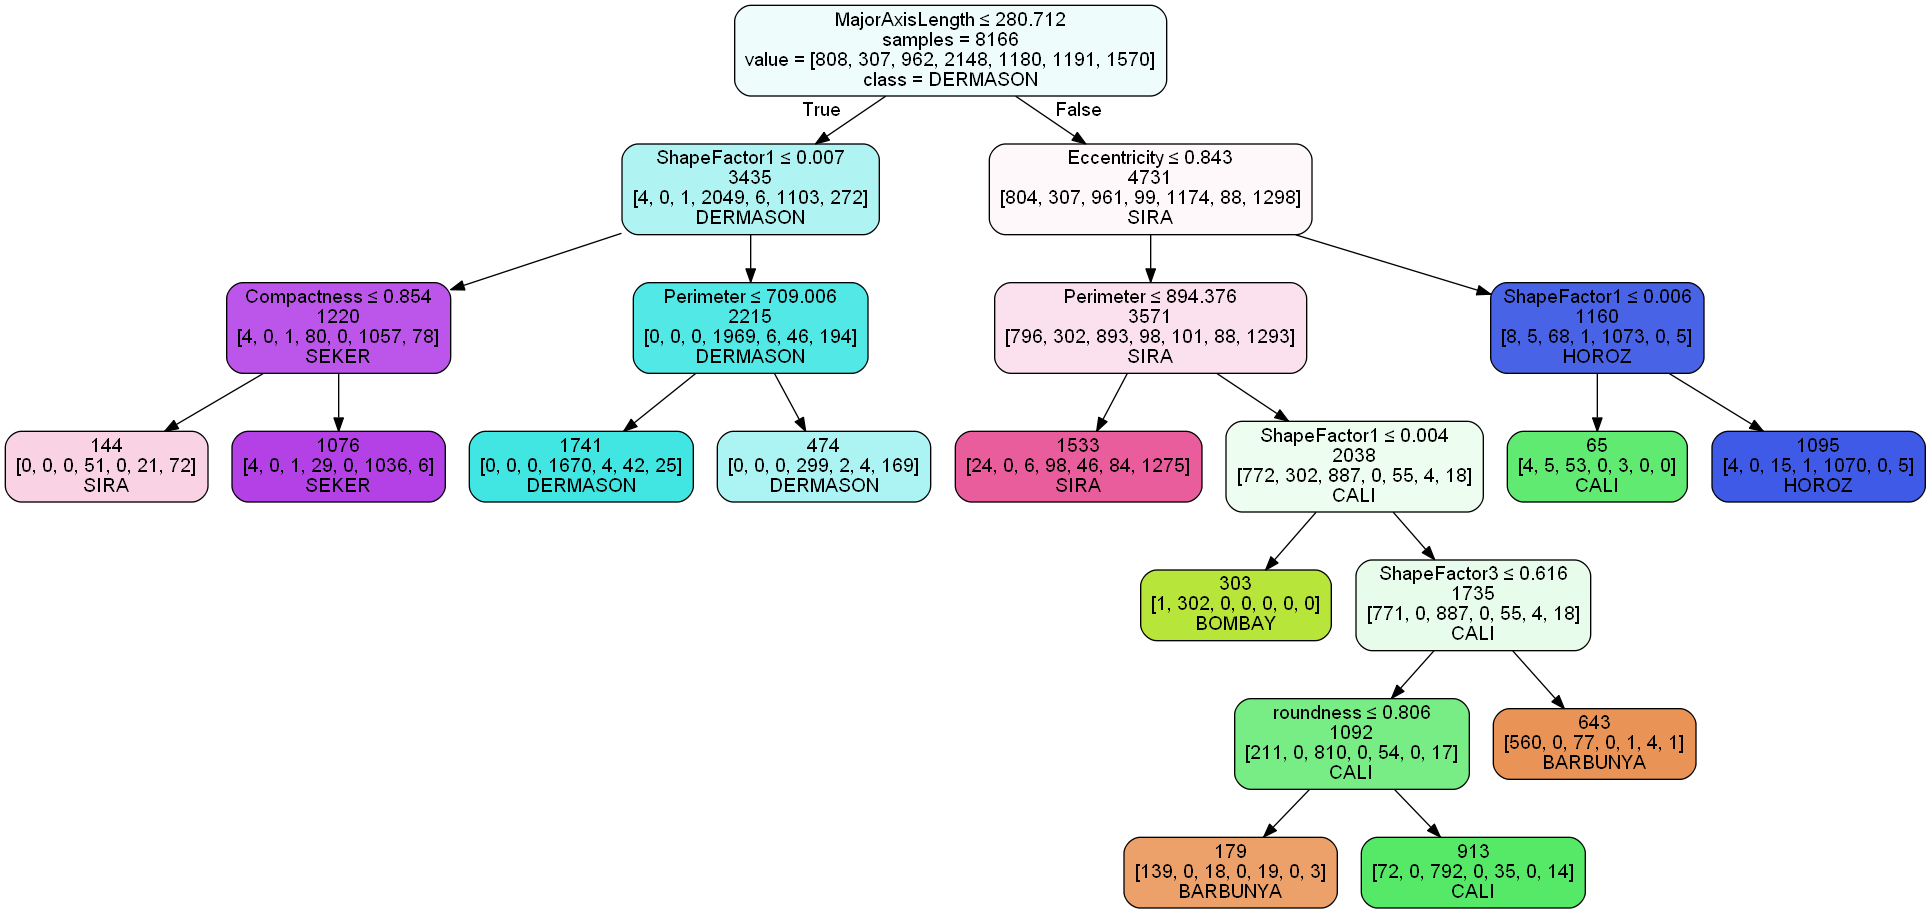

In [15]:
# Create a data frame in Python using Dry_Bean_Dataset.csv file.
drybean_df = pd.read_csv('Dry_Bean_Dataset.csv')
# Develop predictors X and output variable Y for the data set.
X = drybean_df.drop(columns=['Class'])
y = drybean_df['Class']

# Develop training (60%) and validation(40% or 0.4) partitions for
# Dry BEans data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 12;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 20.   
smallClassTree = DecisionTreeClassifier(max_depth=12, 
        min_impurity_decrease=0.01, min_samples_split=20)
smallClassTree.fit(train_X, train_y)

# Display classes used in the classification tree: 'Nonowner' and 'Owner'. 
print("Classes: {}".format(', '.join(smallClassTree.classes_)))


# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns,class_names=smallClassTree.classes_)

In [16]:
# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, smallClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8900)

       Prediction
Actual    0    1    2    3    4    5    6
     0  699    1   76    0    4    4   24
     1    0  302    5    0    0    0    0
     2   95    0  845    0   15    1    6
     3    0    0    0 1969    1   29  149
     4   20    0   38    6 1070    0   46
     5    4    0    0   46    0 1036  105
     6    4    0   14  194    5    6 1347

Validation Partition
Confusion Matrix (Accuracy 0.8779)

       Prediction
Actual    0    1    2    3    4    5    6
     0  431    0   49    0    3    1   30
     1    0  212    3    0    0    0    0
     2   72    0  579    0   14    0    3
     3    0    0    0 1293    0   13   92
     4   15    0   24    8  662    0   39
     5    5    0    0   47    0  694   90
     6    2    0   14  127    5    9  909


## Grid Search Algorithm

In [17]:
# Start with initial guess for parameters.
param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.9085
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


## Improve Classification tree search parameters using Initial guess paramters

In [18]:
# Improve grid search parameters by adapting grid based 
# on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0.0005, 0.001,0.005], 
    'min_samples_split': list(range(10, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.9096
Improved parameters:  {'max_depth': 15, 'min_impurity_decrease': 0.0005, 'min_samples_split': 14}


Best Classification Tree with Grid Search


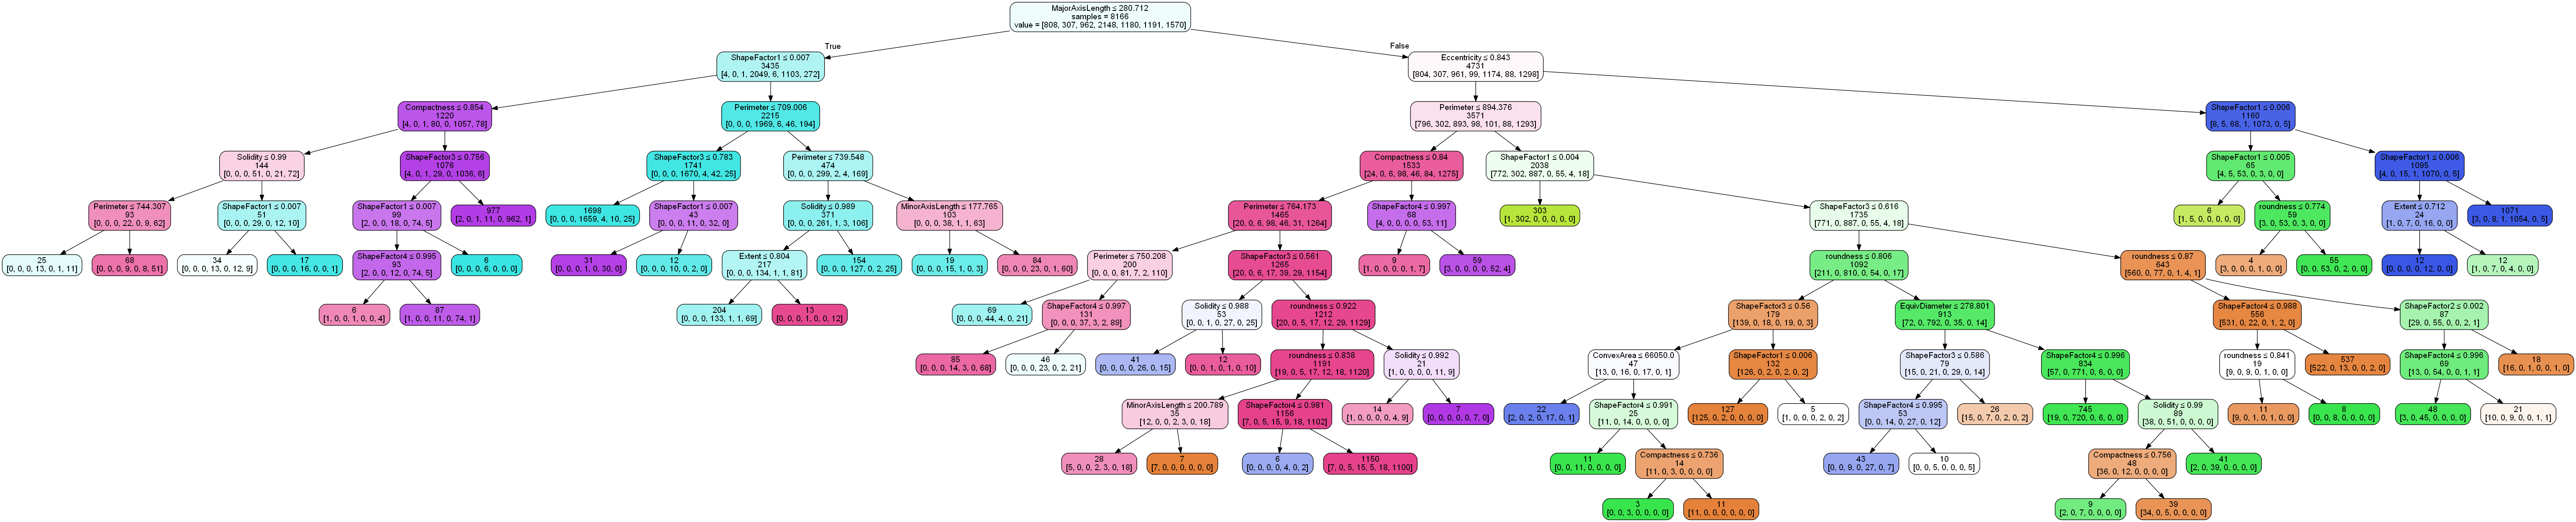

In [19]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

## Identify and display number of nodes in the tree based on grid search.

In [20]:
tree_nodes_grid = bestClassTree.tree_.node_count
print('Number of nodes:', tree_nodes_grid)

Number of nodes: 109


## Confusion matrices for grid search classification tree. 

In [21]:
# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9334)

       Prediction
Actual    0    1    2    3    4    5    6
     0  752    2   27    0    6    6   15
     1    0  307    0    0    0    0    0
     2   38    0  898    0   19    1    6
     3    0    0    0 2059    1   23   65
     4    4    0   12   10 1142    0   12
     5    4    0    0   30    0 1125   32
     6    3    0    5  185   32    6 1339

Validation Partition
Confusion Matrix (Accuracy 0.9065)

       Prediction
Actual    0    1    2    3    4    5    6
     0  460    0   28    1    4    3   18
     1    0  215    0    0    0    0    0
     2   49    2  601    0   13    1    2
     3    0    0    0 1325    1   10   62
     4    1    0   11   13  705    0   18
     5    5    0    0   48    0  759   24
     6    8    0    4  139   30   14  871


## Apply Random Forest algorithm

In [22]:
# Apply RandomForestClassifier() function to develop a combined
# (ensemple) classification tree using Random Forest algorithm.
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

# Display number of nodes in Random Forest trees.
n_nodes = rf.estimators_[0].tree_.node_count
print('Number of Nodes in Tree in Random Forest:', n_nodes)

Number of Nodes in Tree in Random Forest: 849


## Confusion matrices for Random Forest classification. 

In [23]:
# Identify  and display confusion matrix for training partition. 
print('Training Partition for Random Forests')
classificationSummary(train_y, rf.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Validation Partition for Random Forests')
classificationSummary(valid_y, rf.predict(valid_X))

Training Partition for Random Forests
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1    2    3    4    5    6
     0  808    0    0    0    0    0    0
     1    0  307    0    0    0    0    0
     2    0    0  962    0    0    0    0
     3    0    0    0 2148    0    0    0
     4    0    0    0    0 1180    0    0
     5    0    0    0    0    0 1191    0
     6    0    0    0    0    0    0 1570

Validation Partition for Random Forests
Confusion Matrix (Accuracy 0.9186)

       Prediction
Actual    0    1    2    3    4    5    6
     0  461    0   30    0    2    3   18
     1    0  215    0    0    0    0    0
     2   24    0  628    0   12    1    3
     3    0    0    0 1300    1   15   82
     4    3    0   10    8  710    0   17
     5    5    0    0   35    0  777   19
     6    2    0    1  118   18   16  911


## For Random Forest, identify variable importance scores. 

In [24]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Develop data frame for variable importance. The table data is sorted
# in descending order (ascending=False).
score_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': importances, 'Std': std})
score_df = score_df.sort_values('Importance', ascending=False)

# Display variable importance for Random Forest results. 
print('Variable Importance Scores for Random Forest')
print(score_df)

Variable Importance Scores for Random Forest
            Feature  Importance       Std
11      Compactness    0.092699  0.079035
1         Perimeter    0.091958  0.083172
14     ShapeFactor3    0.091917  0.081914
12     ShapeFactor1    0.081912  0.078824
2   MajorAxisLength    0.080599  0.087524
6        ConvexArea    0.077455  0.080435
3   MinorAxisLength    0.072978  0.073645
5      Eccentricity    0.066677  0.072481
4      AspectRation    0.066571  0.070333
7     EquivDiameter    0.059260  0.066783
0              Area    0.057875  0.069345
10        roundness    0.053095  0.028136
13     ShapeFactor2    0.046968  0.059117
15     ShapeFactor4    0.030051  0.012809
9          Solidity    0.019296  0.006805
8            Extent    0.010690  0.002975


## Develop variable importance plot.

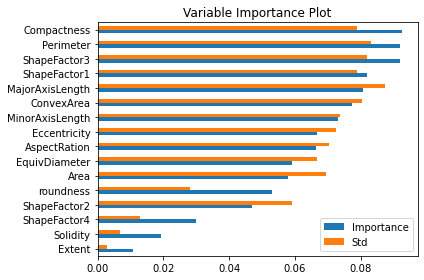

In [25]:
score_df = score_df.sort_values('Importance')
ax = score_df.plot(kind='barh', x='Feature')
ax.set_ylabel('')
plt.title('Variable Importance Plot')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Apply Boosted Tree algorithm

In [26]:
# Apply GradientBoostingClassifier() function to develop a combined
# boosted tree.  
boost = GradientBoostingClassifier(n_estimators=500, random_state=1)
boost.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500, random_state=1)

## Confusion matrices for Boosted Tree classification.

In [27]:
# Identify  and show confusion matrix for training partition. 
print('Training Partition for Boosted Tree')
classificationSummary(train_y, boost.predict(train_X))

# Identify  and show confusion matrix for validation partition. 
print()
print('Validation Partition for Boosted Tree')
classificationSummary(valid_y, boost.predict(valid_X))

Training Partition for Boosted Tree
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1    2    3    4    5    6
     0  808    0    0    0    0    0    0
     1    0  307    0    0    0    0    0
     2    0    0  962    0    0    0    0
     3    0    0    0 2148    0    0    0
     4    0    0    0    0 1180    0    0
     5    0    0    0    0    0 1191    0
     6    0    0    0    0    0    0 1570

Validation Partition for Boosted Tree
Confusion Matrix (Accuracy 0.9216)

       Prediction
Actual    0    1    2    3    4    5    6
     0  471    0   24    1    1    4   13
     1    0  215    0    0    0    0    0
     2   19    0  634    0   10    1    4
     3    0    0    0 1294    3   12   89
     4    2    0   12    9  704    0   21
     5    4    0    0   30    0  777   25
     6    1    0    0  114   15   13  923


# Neural Networks Model for Drybean Dataset

In [28]:
# Create a data frame in Python using Dry_Bean_Dataset.csv file.
drybean_df = pd.read_csv('Dry_Bean_Dataset.csv')
# Develop predictors X and output variable Y for the data set.
X = drybean_df.drop(columns=['Class'])
y = drybean_df['Class']

# Develop training (60%) and validation(40% or 0.4) partitions for Dry Beans data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [29]:
# Using StandardScaler() funtion to normalize values of all predictors
scaler = StandardScaler() 
train_X = scaler.fit_transform(train_X)
valid_X = scaler.transform(valid_X)

In [30]:
# Use MLPCclassifier() function to train neural network model.
bean_df_clf=MLPClassifier(hidden_layer_sizes=(12), 
                    max_iter=10000, 
                    solver='lbfgs',
                    activation='logistic',
                    random_state=1                   
                    )

# Fititng the MLPClassifier on the training set
bean_df_clf.fit(train_X, train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=12, max_iter=10000,
              random_state=1, solver='lbfgs')

In [31]:
# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Dry Beans Neural Network Model')
print(bean_df_clf.intercepts_)

print()
print('Network Weights for Dry Beans Neural Network Model')
print(bean_df_clf.coefs_)

Final Intercepts for Dry Beans Neural Network Model
[array([-4.79598706, 27.39847153,  1.27073573,  1.13308799,  8.95352137,
       -0.55029283, -0.16815019, 27.17133122,  5.61343474, -0.83445201,
        0.89136045, -1.51868691]), array([-14.39710023,  12.13522694,   4.06840907,  -1.68199515,
        25.00185735,   7.4553393 , -32.27495493])]

Network Weights for Dry Beans Neural Network Model
[array([[ 3.37309210e+00,  6.92002702e+00, -4.12051125e+00,
        -5.71104114e+00, -3.02332319e+00, -3.67606073e+00,
        -3.88386728e+00, -1.22090212e+01,  1.00039762e+01,
        -1.51264358e-01,  9.95858818e-01,  3.10787782e+00],
       [-5.82394721e+00,  5.01784387e+00, -2.64565082e+00,
        -3.14540335e-01, -1.95500890e+01,  3.58385167e+00,
         4.31595795e-01, -1.60369644e+01, -1.68618428e+01,
         4.51395236e+00,  5.93792829e+00, -3.11348460e+00],
       [-3.46596682e+00,  1.00418889e+01, -2.89727492e+00,
         9.57597104e+00, -1.15999195e+01, -1.17056493e+01,
         

In [32]:
# Predicting the data for the validation dataset
bean_df_pred=bean_df_clf.predict(valid_X)

bean_df_pred_prob = np.round(bean_df_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for validation set. 
bean_df_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in bean_df_pred_prob],
                'p(1)': [p[1] for p in bean_df_pred_prob],
                'p(2)': [p[2] for p in bean_df_pred_prob],
                'p(3)': [p[3] for p in bean_df_pred_prob],
                'p(4)': [p[4] for p in bean_df_pred_prob],
                'p(5)': [p[5] for p in bean_df_pred_prob],
                'p(6)': [p[6] for p in bean_df_pred_prob],
                'Classification': bean_df_pred})

print('Classification for Dry Beans Data for Validation Set')
print(bean_df_pred_result.head(10))

Classification for Dry Beans Data for Validation Set
         Actual    p(0)  p(1)    p(2)    p(3)    p(4)    p(5)    p(6)  \
10057      SIRA  0.0176   0.0  0.0126  0.0000  0.0125  0.0061  0.9512   
13354  DERMASON  0.0000   0.0  0.0000  0.7951  0.0009  0.0007  0.2032   
13141  DERMASON  0.0000   0.0  0.0000  0.8450  0.0011  0.0002  0.1538   
8634       SIRA  0.0087   0.0  0.0000  0.0000  0.0358  0.0093  0.9461   
12579  DERMASON  0.0000   0.0  0.0000  0.8446  0.0009  0.0081  0.1463   
11088  DERMASON  0.0000   0.0  0.0000  0.9996  0.0004  0.0000  0.0000   
13111  DERMASON  0.0000   0.0  0.0000  0.9210  0.0010  0.0002  0.0778   
9369       SIRA  0.0000   0.0  0.0039  0.0000  0.7933  0.0002  0.2026   
9826       SIRA  0.0002   0.0  0.0165  0.0000  0.0006  0.0005  0.9822   
13193  DERMASON  0.0000   0.0  0.0000  0.7808  0.0007  0.0001  0.2184   

      Classification  
10057           SIRA  
13354       DERMASON  
13141       DERMASON  
8634            SIRA  
12579       DERMASON  
11088

## Confusion Matrices of Neural Network model for Dry Beans Dataset. 

In [33]:
# Identify and display confusion matrix for training set. 
print('Training Set for Neural Network Model')
classificationSummary(train_y, bean_df_clf.predict(train_X))

# Identify and display confusion matrix for validation set. 
print()
print('Validation Set for Neural Network Model')
classificationSummary(valid_y, bean_df_clf.predict(valid_X))

Training Set for Neural Network Model
Confusion Matrix (Accuracy 0.9451)

       Prediction
Actual    0    1    2    3    4    5    6
     0  766    0   22    0    4    3   13
     1    0  307    0    0    0    0    0
     2   14    0  926    0   14    1    7
     3    0    0    0 2032    1   15  100
     4    1    0   15    8 1142    0   14
     5    2    0    1   17    0 1146   25
     6    4    0    1  143   11   12 1399

Validation Set for Neural Network Model
Confusion Matrix (Accuracy 0.9256)

       Prediction
Actual    0    1    2    3    4    5    6
     0  477    1   20    0    3    4    9
     1    0  213    2    0    0    0    0
     2   17    0  636    0    8    1    6
     3    0    0    0 1306    3   15   74
     4    4    0    8    6  705    0   25
     5    6    0    2   32    0  779   17
     6    4    0    1  100   24   13  924


## GridSearchCV algorithm

In [34]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=2, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.9284
Best parameter:  {'hidden_layer_sizes': 10}


## Improved Neural Network model for Dry Beans based on grid search best parameter

In [35]:
# Use MLPCclassifier() function to train the improved neural network model based on grid search results. 
 
bean_df_clf_imp = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, 
                    random_state=1,
                    solver='lbfgs',
                    activation='logistic' 
                    )

bean_df_clf_imp.fit(train_X, train_y)

# Display network structure with the final values of intercepts (Theta) and weights (W).
print('Final Intercepts for Dry Beans Neural Network Model')
print(bean_df_clf_imp.intercepts_)

print()
print('Network Weights for Dry Beans Neural Network Model')
print(bean_df_clf_imp.coefs_)

Final Intercepts for Dry Beans Neural Network Model
[array([  4.02309905, -23.65028444,  -1.54792524,   3.58001293,
        -2.16064317,   0.79376952,  -0.2116581 ,   1.74958047,
         2.40122606,   1.38831839]), array([  0.52762531,   6.83267784,  -7.57570471, -10.06110655,
        -1.58129442,  14.28827758,  -2.48269938])]

Network Weights for Dry Beans Neural Network Model
[array([[ 3.78548587e+00, -5.47918153e+00, -2.44716675e+00,
        -1.30852618e+01, -2.56406711e+00, -4.17292838e+00,
        -9.57022069e-02, -2.25339615e+00, -4.23143208e-01,
         4.11000189e+00],
       [ 4.08642695e+00, -9.56109963e+00,  2.58674580e+00,
         1.63232955e+01,  7.40145528e+00,  4.74238574e+00,
        -6.94975482e+00, -1.97083448e+00, -3.25995388e+00,
        -2.69861639e+00],
       [-1.81088499e+00, -8.61458345e+00,  4.35084899e+00,
         3.71530238e+00,  2.60002018e+00,  4.26339051e+00,
         3.04183696e+00,  2.74878502e+00,  4.14231781e+00,
        -3.70710602e+00],
       [

# Confusion Matrices of improved neural network model for Dry Beans based on GridSearchCV results.

In [36]:
# Identify and display confusion matrix for training set. 
print('Training Set for Neural Network Model')
classificationSummary(train_y, bean_df_clf_imp.predict(train_X))

# Identify and display confusion matrix for validation set. 
print()
print('Validation Set for Neural Network Model')
classificationSummary(valid_y, bean_df_clf_imp.predict(valid_X))

Training Set for Neural Network Model
Confusion Matrix (Accuracy 0.9384)

       Prediction
Actual    0    1    2    3    4    5    6
     0  759    0   26    0    4    4   15
     1    0  307    0    0    0    0    0
     2   24    0  911    0   16    2    9
     3    0    0    0 2026    1   20  101
     4    1    0   18    8 1131    0   22
     5    1    0    1   16    0 1147   26
     6    6    0    4  147   19   12 1382

Validation Set for Neural Network Model
Confusion Matrix (Accuracy 0.9280)

       Prediction
Actual    0    1    2    3    4    5    6
     0  473    0   26    1    6    2    6
     1    0  215    0    0    0    0    0
     2   18    0  637    0    8    1    4
     3    0    0    0 1310    2   16   70
     4    1    0   12    8  710    1   16
     5    6    0    0   30    0  784   16
     6    5    0    1  103   21   12  924


In [37]:
# For each hidden_layer_size, display grid search results including mean and standard deviation of the score. 
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         2         0.919912        0.006123
1                         3         0.923463        0.004041
2                         4         0.924443        0.004531
3                         5         0.926157        0.002817
4                         6         0.926647        0.001837
5                         7         0.926770        0.002449
6                         8         0.927137        0.002082
7                         9         0.925912        0.003306
8                        10         0.928361        0.001347
9                        11         0.923708        0.001592
10                       12         0.924565        0.000000
11                       13         0.922483        0.005021
12                       14         0.922851        0.002449
13                       15         0.923953        0.001102
14                       16         0.921014        0.004531
15                      

<AxesSubplot:xlabel='param_hidden_layer_sizes'>

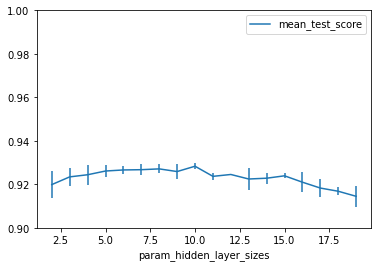

In [38]:
# Develop a plot that demostrates mean_test_score and std_test_score.
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                    y='mean_test_score', yerr='std_test_score', ylim=(0.9, 1.0))